# Visualize the Results of SpatioCell

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

import json
from pathlib import Path
import tarfile

In [2]:
def make_targz(output_filename, source_dir):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=Path(source_dir).name)

    return

## Load data

In [3]:
image_file = './CytAssist_FFPE_Human_Lung_Squamous_Cell_Carcinoma_tissue_image.tif'
nuclei_seg_json_file = './CytAssist_FFPE_Human_Lung_Squamous_Cell_Carcinoma_tissue_image.json'
cell_info_file = './outs/cell_info.json'

In [16]:
image_file = '/data1/zhaoshutao/projectworkspace/nucleus_recognition/HEpng_img/WMQ-587-mLung/WMQ-587-mLung.png'
nuclei_seg_json_file = '/data1/hounaiqiao/project111/zst/WMQ-587-mLung.json'
cell_info_file = '/data1/hounaiqiao/project111/zst/cell_info.json'

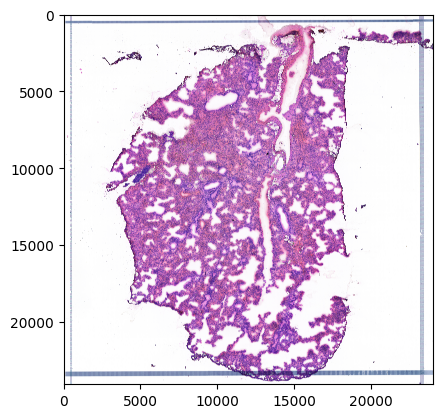

In [17]:
# cv2
image = cv2.cvtColor(cv2.imread(image_file), cv2.COLOR_BGR2RGB)
with open(nuclei_seg_json_file, 'r') as f:
    nuclei_seg = json.load(f)
with open(cell_info_file, 'r') as f:
    cell_info = json.load(f)

plt.imshow(image)
plt.show()

In [19]:
cell_info['141977']

{'centroid': [1170.3798509850528, 3903.192393838278],
 'type_prob': [0.007772705517709255,
  0.00010456510062795132,
  0.00032087889849208295,
  0.00040813832310959697,
  4.1944713302655146e-06,
  0.9913895726203918],
 'type': 'Epi',
 'assign': 'Type_2_pneumocytes',
 'random_guess': 'Mesothelial_cells',
 'gt': 'unassigned type'}

## Plot

In [20]:
assigned_color = {
    'Alveolar_macrophage': (34, 34, 34),
    'B_cells': (243, 195, 0),
    'CD209+/Cd11b+_dendritic_cells': (135, 86, 146),
    'CD8+_T_cells': (243, 132, 0),
    'Capillary_endothelial_cells': (161, 202, 241),
    'Ccl17+/Cd103-/Cd11b-_dendritic_cells': (190, 0, 50),
    'Cd103+/Cd11b-_dendritic_cells': (194, 178, 128),
    'Cd4+_T_cells': (132, 132, 130),
    'Ciliated_cells': (0, 136, 86),
    'Club_cells': (230, 143, 172),
    'Eosinophils': (0, 103, 165),
    'Fn1+_macrophage': (249, 147, 121),
    'Gamma-Delta_T_cells': (96, 78, 151),
    'Goblet_cells': (246, 166, 0),
    'Interstitial_Fibroblast': (179, 68, 108),
    'Interstitial_macrophages': (220, 211, 0),
    'Lipofibroblast': (136, 45, 23),
    'Megakaryocytes': (141, 182, 0),
    'Mesothelial_cells': (101, 69, 34),
    'Mki67+_proliferating_cells': (226, 88, 34),
    'Natural_Killer_cells': (43, 61, 38),
    'Neutrophils': (90, 81, 86),
    'Plasma_cells': (228, 225, 227),
    'Smooth_muscle_cells': (246, 34, 46),
    'Type1_pneumocytes': (254, 0, 250),
    'Type_2_pneumocytes': (22, 255, 50),
    'Vcam1+_endothelial_cells': (50, 131, 254),
    'classical_monocyte_(Ly6c2+)': (254, 175, 22),
    'lymphatic_endothelial_cells': (28, 255, 206),
    'non-classical_monocyte_(Ly6c2-)': (144, 173, 28),
    'red_blood_cells': (46, 217, 255),
    'vascular_endothelial_cells': (222, 160, 253)
}

100%|██████████| 32/32 [06:03<00:00, 11.35s/it]


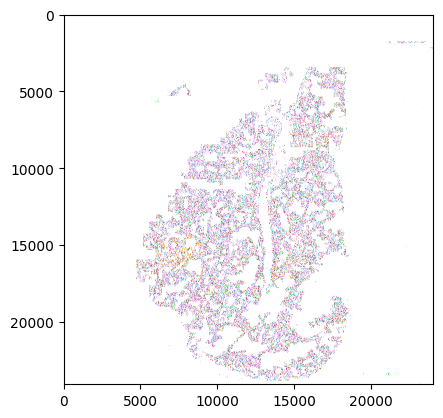

In [21]:
mask_assigned = np.full(image.shape, 255, dtype=np.uint8)
mask_guessed = np.full(image.shape, 255, dtype=np.uint8)
mask_gt = np.full(image.shape, 255, dtype=np.uint8)
mask_alpha = np.full(image.shape[: 2], 0, dtype=np.uint8)

seg_colors = {'Neo': (255, 0, 0), 'Conn': (0, 255, 0), 'Inflam': (255, 255, 0), 'Dead': (0, 255, 255), 'Epi': (255, 0, 255)}

# assigned_color = {
#     "B cell": (255, 82, 82),
#     "Plasma cell": (255, 128, 171),
#     "T cell": (224, 64, 251),
#     "NK cell": (255, 171, 64),
#     "Mast cell": (255, 64, 129),
#     "Macrophage/Monocyte": (197, 17, 98),
#     'Neutrophil': (170, 0, 255),
#     "DC": (83, 109, 254),
#     "Endothelial cell": (124, 77, 255),
#     "Epithelial cell": (24, 255, 255),
#     "Cancer cell": (118, 255, 3),
#     "Stromal": (255, 255, 0),
#     "unassigned type": (169, 169, 169),
#     "Dead": (169, 169, 169),
# }

line_width = -1
outline = False
outline_width = 15
outline_alpha = 0.4

for minor_type in tqdm(assigned_color.keys()):
    assigned_contours = [np.array(nuclei_seg['nuc'][i]['contour']) for i in cell_info.keys() if cell_info[i]['assign'] == minor_type]
    guessed_contours = [np.array(nuclei_seg['nuc'][i]['contour']) for i in cell_info.keys() if cell_info[i]['random_guess'] == minor_type]
    gt_contours = [np.array(nuclei_seg['nuc'][i]['contour']) for i in cell_info.keys() if cell_info[i]['gt'] == minor_type]

    cv2.drawContours(mask_assigned, assigned_contours, -1, assigned_color[minor_type], line_width)
    cv2.drawContours(mask_guessed, guessed_contours, -1, assigned_color[minor_type], line_width)
    cv2.drawContours(mask_gt, gt_contours, -1, assigned_color[minor_type], line_width)
    cv2.drawContours(mask_alpha, assigned_contours, -1, 255, line_width)

    if outline:
        mask_assigned = outline(mask_assigned, assigned_contours, assigned_color[minor_type], outline_width)
        mask_guessed = outline(mask_guessed, guessed_contours, assigned_color[minor_type], outline_width)
        mask_gt = outline(mask_gt, gt_contours, assigned_color[minor_type], outline_width)
        mask_alpha = outline(mask_alpha, assigned_contours, round(255 * outline_alpha), outline_width)

mask_assigned = cv2.cvtColor(mask_assigned, cv2.COLOR_RGB2RGBA)
mask_guessed = cv2.cvtColor(mask_guessed, cv2.COLOR_RGB2RGBA)
mask_gt = cv2.cvtColor(mask_gt, cv2.COLOR_RGB2RGBA)
# mask_assigned[..., 3] = mask_alpha
# mask_guessed[..., 3] = mask_alpha
# mask_gt[..., 3] = mask_alpha

plt.imshow(mask_assigned)
plt.show()

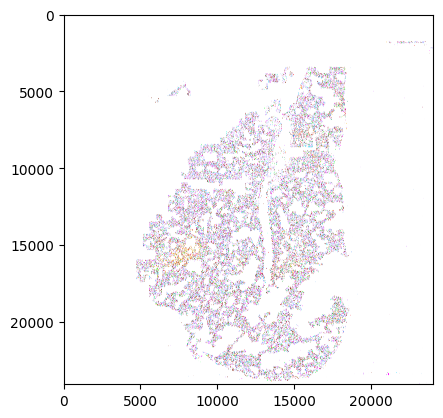

In [22]:
plt.imshow(mask_guessed)
plt.show()

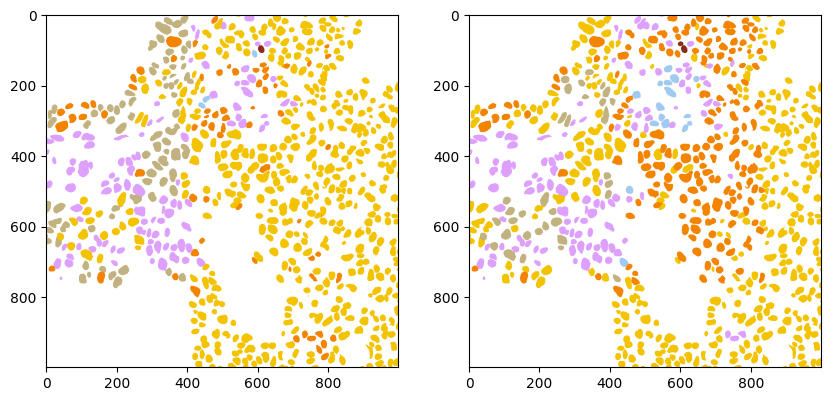

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(mask_guessed[15000:16000,7000:8000,:])
ax[1].imshow(mask_assigned[15000:16000,7000:8000,:])

plt.show()

## Save

In [ ]:
save_dir = './outs/view/'

image_resized = cv2.resize(image, fx=0.5, fy=0.5, dsize=(0, 0))
mask_assigned_resized = cv2.resize(mask_assigned, fx=0.5, fy=0.5, dsize=(0, 0))
mask_guessed_resized = cv2.resize(mask_guessed, fx=0.5, fy=0.5, dsize=(0, 0))
mask_gt_resized = cv2.resize(mask_gt, fx=0.5, fy=0.5, dsize=(0, 0))

Path(save_dir).mkdir(parents=True, exist_ok=True)
cv2.imwrite('%s/image_resized.png' % save_dir, cv2.cvtColor(image_resized, cv2.COLOR_RGB2BGR))
cv2.imwrite('%s/assigned_mask_resized.png' % save_dir, cv2.cvtColor(mask_assigned_resized, cv2.COLOR_RGBA2BGRA))
cv2.imwrite('%s/guessed_mask_resized.png' % save_dir, cv2.cvtColor(mask_guessed_resized, cv2.COLOR_RGBA2BGRA))
cv2.imwrite('%s/gt_mask_resized.png' % save_dir, cv2.cvtColor(mask_gt_resized, cv2.COLOR_RGBA2BGRA))

make_targz('%s/%s.tar.gz' % (Path(save_dir).parent, Path(save_dir).name), save_dir)